In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [90]:
Dpath = 'C:\\Users\\User\\Google Drive\\FishIsland_Outputs/Upscaled_Estimates.csv'

Data = pd.read_csv(Dpath,index_col=['datetime'],parse_dates=['datetime'])
Data = Data.drop(columns=['datetime.1'])
Data.head()

,fch4,fco2,ch4_flux,co2_flux,Air_Temp,Rainfall,wind_speed,Wind_Direction,Net_SW,Net_LW,...,NME_est_FP_20,NME_est_FP_21,NME_est_FP_22,NME_est_FP_23,NME_est_FP_24,NME_est_FP_25,NME_est_FP_26,NME_est_FP_27,NME_est_FP_28,NME_est_FP_29
datetime,,,,,,,,,,,,,,,,,,,,,
2009-05-01 00:00:00,NaN,NaN,NaN,NaN,-1.0,NaN,2.1,78.0,-2.47,-43.32,...,17.947277,39.831540,52.178207,43.083990,49.049435,19.991646,24.974634,40.068210,44.460350,23.285896
2009-05-01 01:00:00,NaN,NaN,NaN,NaN,-1.3,NaN,1.9,102.4,-2.58,-40.42,...,18.653866,40.651580,52.134370,43.697857,48.772552,20.136444,25.009968,40.744770,44.442345,23.694458
2009-05-01 02:00:00,NaN,NaN,NaN,NaN,-1.1,NaN,2.2,154.3,-1.94,-38.93,...,16.797558,38.929108,51.864550,43.376125,48.812680,20.240597,23.199669,39.590706,44.024315,23.172945
2009-05-01 03:00:00,NaN,NaN,NaN,NaN,-1.4,NaN,2.4,155.8,-1.99,-38.63,...,15.762973,37.900320,51.692448,42.926567,48.740833,20.166843,21.992357,38.783867,43.762850,22.770962
2009-05-01 04:00:00,NaN,NaN,NaN,NaN,-1.2,NaN,2.0,168.4,-1.84,-35.40,...,17.335518,39.700275,51.817390,44.069244,48.628246,20.475637,23.561457,40.367977,43.996540,23.622940


                Season          GS
datetime                          
2009-12-31  149.958333   81.416667
2010-12-31  133.958333   96.833333
2011-12-31  139.958333   95.395833
2012-12-31  148.958333  100.520833
2013-12-31  158.958333   87.916667
2014-12-31  156.958333   93.583333
2015-12-31  149.958333   99.729167
2016-12-31  157.958333   99.645833
2017-12-31  148.958333  106.208333
2018-12-31  114.958333   90.041667
2019-12-31  163.958333  116.270833
           Season_Dates   GS_Dates
datetime                          
2009-12-31   2009-05-17 2009-04-21
2010-12-31   2010-05-24 2010-04-29
2011-12-31   2011-05-17 2011-05-03
2012-12-31   2012-05-12 2012-04-30
2013-12-31   2013-05-16 2013-04-24
2014-12-31   2014-05-02 2014-04-23
2015-12-31   2015-05-07 2015-04-23
2016-12-31   2016-05-02 2016-04-23
2017-12-31   2017-05-15 2017-05-03
2018-12-31   2018-05-30 2018-05-03
2019-12-31   2019-05-19 2019-04-22
           Season_Dates   GS_Dates
datetime                          
2009-12-31   2009-10

<IPython.core.display.Javascript object>


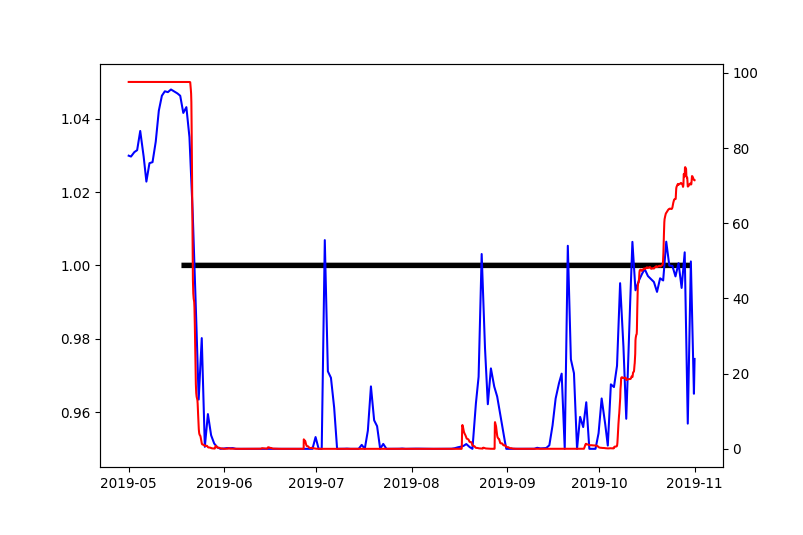

datetime
2019-05-01 18:00:00   -0.039756
2019-05-02 18:00:00   -0.039791
2019-05-03 18:00:00   -0.040050
2019-05-04 18:00:00   -0.040103
2019-05-05 18:00:00   -0.049849
                         ...   
2019-10-23 18:00:00    0.047138
2019-10-24 18:00:00    0.051024
2019-10-25 18:00:00    0.056488
2019-10-26 18:00:00    0.057130
2019-10-27 18:00:00   -0.003046
Name: ndvi_FI_LCP, Length: 180, dtype: float64


In [89]:
Data.loc[((Data.index.day == 31)&(Data.index.month==10)),'Season']=np.nan
Data['GS']=np.nan

Max_NDVI = (Data.resample('Y').max()[['NDVI_interp']])
for i,row in Max_NDVI.iterrows():
    MxD = Data.loc[((Data.index.year==i.year)&(Data.NDVI_interp==row['NDVI_interp']))].index.dayofyear[0]
    Max_NDVI.loc[Max_NDVI.index.year==i,'Max_Day']=MxD
    Data.loc[((Data.index.year==i.year)&(Data.index.dayofyear<=MxD)
             &(Data.NDVI_interp>=0.25)),'GS']=1
    Data.loc[((Data.index.year==i.year)&(Data.index.dayofyear>=MxD)
             &(Data.NDVI_interp/row['NDVI_interp']>=0.9)),'GS']=1
    Data.loc[((Data.index.year==i.year)&(Data.index.dayofyear>=MxD)
             &(Data.NDVI_interp/row['NDVI_interp']<=0.9)&(Data['Season']==1)),'GS']=0.5

Data['Season_Days'] = Data['Season']*Data.index.dayofyear
Data['GS_Days'] = Data['GS']*Data.index.dayofyear
Data['Season_Dates']=pd.to_datetime(Data.index.year * 1000 + Data['Season_Days'], format='%Y%j')
Data['GS_Dates']=pd.to_datetime(Data.index.year * 1000 + Data['GS_Days'], format='%Y%j')
    
print(Data.resample('Y').sum()[['Season','GS']]/24)
print(Data.resample('Y').min()[['Season_Dates','GS_Dates']])
print(Data.resample('Y').max()[['Season_Dates','GS_Dates']])   
    
Study_Year = Data.loc[Data.index.year == 2019]

plt.figure()
plt.plot(Study_Year[['Season']],color='k',linewidth=4)
# plt.plot(Study_Year[['GS']]+1)
x2 = plt.twinx()
# x2.plot(Study_Year['NDVI_interp']*100,color='orange')
x2.plot(Study_Year['NDSI_interp'],color='b')
x2.plot(Study_Year['snow_cover'],color='r')
print(Study_Year['ndvi_FI_LCP'].dropna())